<a href="https://colab.research.google.com/github/ankitabanerjee05/Cyclone-Predicting-Model-AICTE-AI-INTERNSHIP/blob/main/TerraForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`TerraForecast`***

> This project uses machine learning to predict drought risk levels (Low, Medium, High) based on environmental factors such as rainfall, temperature, soil moisture, vegetation index, and water availability, helping in early drought assessment and resource planning.



## ***Importing required libraries***

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv('global_drought_prediction_dataset.csv')
df.head()


Saving global_drought_prediction_dataset.csv to global_drought_prediction_dataset (2).csv


,Area_ID,Region,Avg_Temperature_C,Annual_Rainfall_mm,Soil_Moisture_%,Humidity_%,Water_Reservoir_Level_%,Vegetation_Index,Drought_Risk_Level
0,1,Australia,21.11,117.38,45.95,54.03,73.30,0.88,Low
1,2,Brazil,44.99,73.02,9.95,65.13,60.74,0.60,Medium
2,3,Spain,41.44,76.32,25.11,55.35,37.81,0.57,Medium
3,4,USA,41.37,134.87,54.11,36.86,75.17,0.28,Low
4,5,Ethiopia,33.85,215.55,7.90,36.40,6.34,0.32,Low


## **Basic data exploration**

In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area_ID                  400 non-null    int64  
 1   Region                   400 non-null    object 
 2   Avg_Temperature_C        400 non-null    float64
 3   Annual_Rainfall_mm       400 non-null    float64
 4   Soil_Moisture_%          400 non-null    float64
 5   Humidity_%               400 non-null    float64
 6   Water_Reservoir_Level_%  400 non-null    float64
 7   Vegetation_Index         400 non-null    float64
 8   Drought_Risk_Level       400 non-null    object 
dtypes: float64(6), int64(1), object(2)
memory usage: 28.3+ KB


In [ ]:
df.describe()


,Area_ID,Avg_Temperature_C,Annual_Rainfall_mm,Soil_Moisture_%,Humidity_%,Water_Reservoir_Level_%,Vegetation_Index
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,200.500000,30.238275,152.122100,33.316425,50.01535,52.541000,0.497425
std,115.614301,8.596049,90.014933,15.661381,23.18438,27.393297,0.229710
min,1.000000,15.010000,0.750000,5.180000,10.36000,5.050000,0.100000
25%,100.750000,23.387500,74.350000,21.067500,29.15500,28.842500,0.310000
50%,200.500000,30.370000,150.040000,33.905000,50.53000,52.600000,0.500000
75%,300.250000,37.730000,235.127500,46.072500,71.19500,74.457500,0.680000
max,400.000000,44.990000,299.170000,59.980000,89.94000,99.590000,0.900000


## **Encode categorical columns**

In [ ]:
label_encoder_region = LabelEncoder()
df['Region'] = label_encoder_region.fit_transform(df['Region'])

label_encoder_target = LabelEncoder()
df['Drought_Risk_Level'] = label_encoder_target.fit_transform(df['Drought_Risk_Level'])


In [ ]:
print(label_encoder_target.classes_)

['High' 'Low' 'Medium']


## **Split features & target**

In [ ]:
X = df.drop(['Area_ID', 'Drought_Risk_Level'], axis=1)
y = df['Drought_Risk_Level']


## **Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## **Train the ML Model**

In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## **Model Prediction**

In [ ]:
y_pred = model.predict(X_test)


## **Model Evaluation**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\n")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.95


              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       1.00      0.98      0.99        54
           2       0.84      1.00      0.91        21

    accuracy                           0.95        80
   macro avg       0.95      0.79      0.83        80
weighted avg       0.96      0.95      0.94        80



# ***`Visualizations`***

## **Conclusion Matrix**

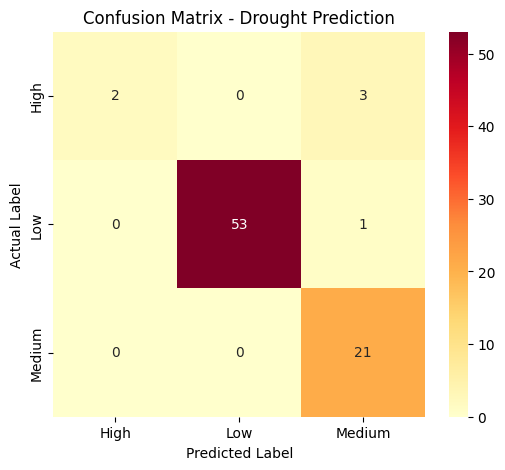

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="YlOrRd",
    xticklabels=label_encoder_target.classes_,
    yticklabels=label_encoder_target.classes_
)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Drought Prediction")
plt.show()


## **Feature Importance**

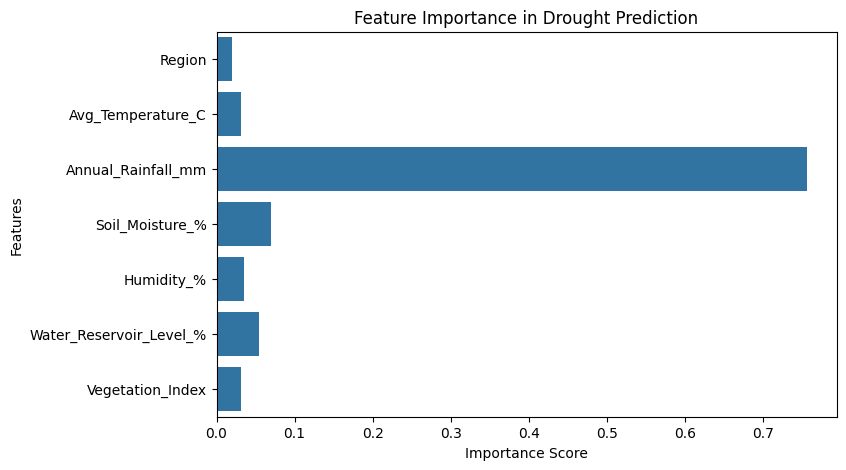

In [ ]:
feature_importance = model.feature_importances_
features = df.drop(['Area_ID', 'Drought_Risk_Level'], axis=1).columns

plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance in Drought Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


## **Actual vs Predicted Distribution**

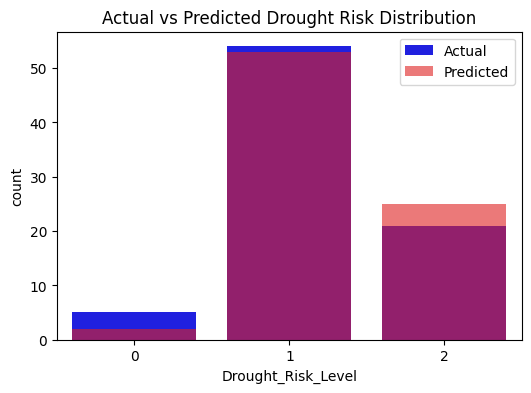

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_test, label="Actual", color="blue")
sns.countplot(x=y_pred, label="Predicted", color="red", alpha=0.6)
plt.legend()
plt.title("Actual vs Predicted Drought Risk Distribution")
plt.show()


## **Correlation Heatmap**

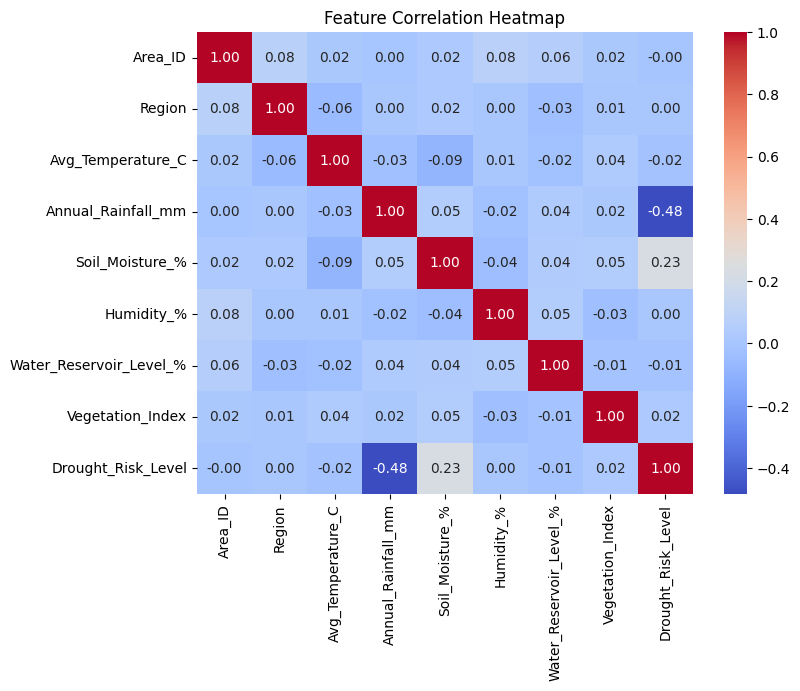

In [ ]:
plt.figure(figsize=(8,6))
corr = df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


## **Pairplot**

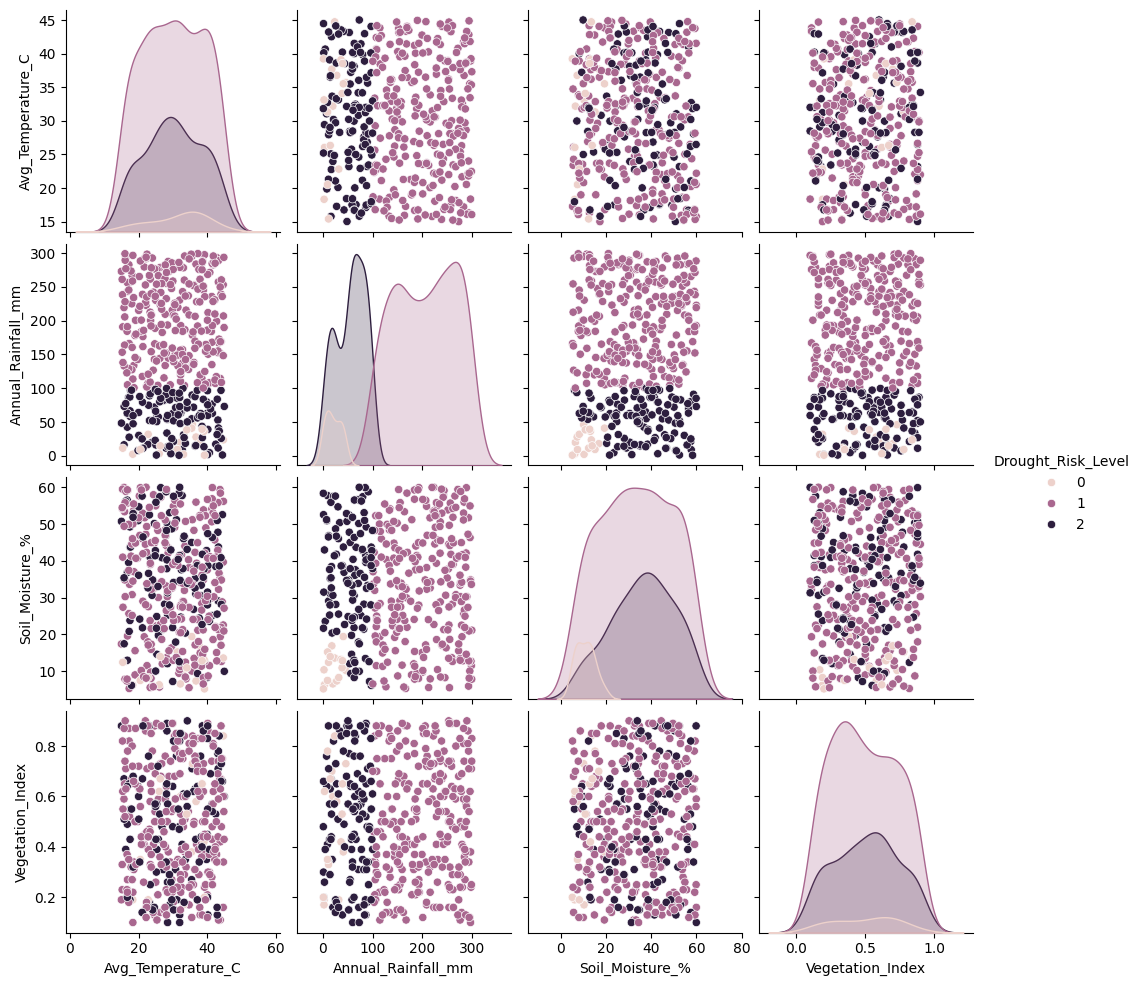

In [ ]:
sns.pairplot(
    df,
    hue="Drought_Risk_Level",
    vars=[
        "Avg_Temperature_C",
        "Annual_Rainfall_mm",
        "Soil_Moisture_%",
        "Vegetation_Index"
    ]
)
plt.show()


# ***Predicting Drought for an Area :***

In [ ]:
# Example input (you can change values)
new_data = np.array([[
    5,        # Region (encoded)
    38.0,     # Avg Temperature
    40.0,     # Rainfall
    15.0,     # Soil Moisture
    25.0,     # Humidity
    20.0,     # Water Reservoir Level
    0.25      # Vegetation Index
]])

new_data_scaled = scaler.transform(new_data)

prediction = model.predict(new_data_scaled)
result = label_encoder_target.inverse_transform(prediction)

print("Predicted Drought Risk:", result[0])


Predicted Drought Risk: High


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
!pip install streamlit pyngrok



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.8 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.0
    Uninstalling cachetools-7.0.0:
      Successfully uninstalled cachetools-7.0.0


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd

st.title("CSV Upload & ML Prediction")

uploaded_file = st.file_uploader("Upload your CSV file", type="csv")

if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.success("File uploaded successfully!")
    st.write(df.head())

    # ML model logic here
    st.write("Prediction output will appear here")


Writing app.py


In [ ]:
!streamlit run app.py &>/content/logs.txt &
